# XGBoost Implementation on Classification and Regression Tasks
 
 This notebook demonstrates the use of XGBoost for two tasks:
 
 **Classification** on the Iris dataset:
    - Load, scale, and split the Iris data.
    - Train an XGBClassifier.
    - Evaluate with confusion matrix, F1 scores, accuracy, and classification report.
    - Visualize the confusion matrix.
    - Perform grid search over hyperparameters.
    - Reduce dimensions with PCA and plot decision boundaries.
 
 **Additional Enhancements:**
 - Use cross-validation for more robust parameter tuning.
 - Visualize feature importances to gain insights into the model.

#### Part 1: XGBoost Classification on Iris Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.decomposition import PCA

import xgboost as xgb
from xgboost import XGBClassifier

/home/netherquark/.conda/envs/ai/lib/python3.11/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


##### 1. Data Loading and Preprocessing
Load the Iris dataset, scale features, and split into training and test sets.

In [3]:
ds = load_iris()      # dataset
x = ds.data           # features
y = ds.target         # labels
sc = StandardScaler()
xs = sc.fit_transform(x) 

#### Split data (80/20)

In [4]:
xtr, xts, ytr, yts = train_test_split(xs, y, test_size=0.2, random_state=42)

#### 2. XGBoost Classification Model Training and Evaluation
 
 We instantiate the XGBClassifier, train it, and evaluate using a confusion matrix, F1 scores (macro, micro, weighted), accuracy, and a classification report.

In [5]:
xgbc = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgbc.fit(xtr, ytr)

/home/netherquark/.conda/envs/ai/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:46:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744352472081/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

#### Predict on test set


In [6]:
yp = xgbc.predict(xts)

#### Evaluation metrics

In [7]:
print("Confusion Matrix:")
print(confusion_matrix(yts, yp))
print("\nF1 Score (Macro):", f1_score(yts, yp, average='macro'))
print("F1 Score (Micro):", f1_score(yts, yp, average='micro'))
print("F1 Score (Weighted):", f1_score(yts, yp, average='weighted'))
print("\nClassification Report:")
print(classification_report(yts, yp))
print("Accuracy:", accuracy_score(yts, yp))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

F1 Score (Macro): 1.0
F1 Score (Micro): 1.0
F1 Score (Weighted): 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


##### 3. Confusion Matrix Visualization
 Display the confusion matrix as a heatmap for a clearer overview of classification performance.

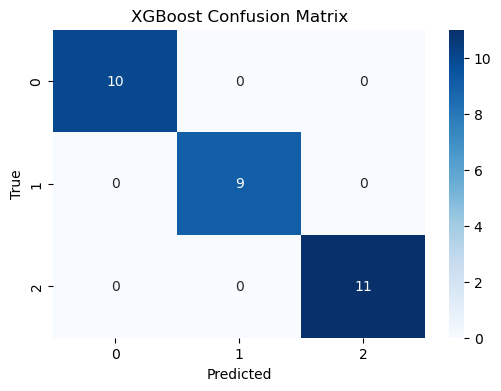

In [8]:
cm = confusion_matrix(yts, yp)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### 4. Hyperparameter Tuning Using Grid Search
 We perform a grid search over two parameters (`max_depth` and `n_estimators`) using 5-fold cross-validation to optimize our classifier’s performance.

In [9]:
pg = {'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 150]}
gs = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
                  pg, cv=5)
gs.fit(xtr, ytr)
print("Best Params:", gs.best_params_)
print("Best CV Score:", gs.best_score_)

/home/netherquark/.conda/envs/ai/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:47:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744352472081/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/netherquark/.conda/envs/ai/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:47:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744352472081/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/netherquark/.conda/envs/ai/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:47:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744352472081/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/netherquark/.conda/envs/ai/lib/python3.11/site-packages/xg

Best Params: {'max_depth': 3, 'n_estimators': 50}
Best CV Score: 0.9416666666666667


/home/netherquark/.conda/envs/ai/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:47:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744352472081/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


#### Evaluate best model on test set

In [10]:
yp_gs = gs.best_estimator_.predict(xts)
print("\nTest Accuracy:", accuracy_score(yts, yp_gs))


Test Accuracy: 1.0


##### 5. PCA-Based Decision Boundary Visualization
 Reduce the 4-dimensional Iris data to 2 dimensions using PCA and plot the decision boundaries.

In [11]:
pca = PCA(n_components=2)
xp = pca.fit_transform(xs)

#### Split PCA data

In [12]:
xtr_p, xts_p, ytr_p, yts_p = train_test_split(xp, y, test_size=0.2, random_state=42)

#### Train XGBClassifier on PCA-transformed data

In [13]:
xgbc_p = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgbc_p.fit(xtr_p, ytr_p)

/home/netherquark/.conda/envs/ai/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [23:47:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1744352472081/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

#### Generate a mesh grid for plotting decision boundaries

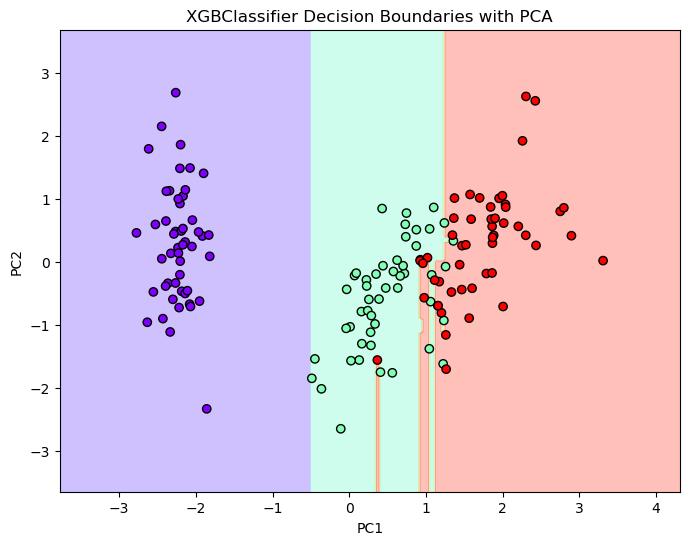

In [14]:
x_min, x_max = xp[:,0].min() - 1, xp[:,0].max() + 1
y_min, y_max = xp[:,1].min() - 1, xp[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = xgbc_p.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.rainbow)
plt.scatter(xp[:, 0], xp[:, 1], c=y, edgecolor='k', cmap=plt.cm.rainbow)
plt.title("XGBClassifier Decision Boundaries with PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()